In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data.fillna(data.mean(),inplace=True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [6]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

In [7]:
data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Checking whether dimensinality reduction is necessary

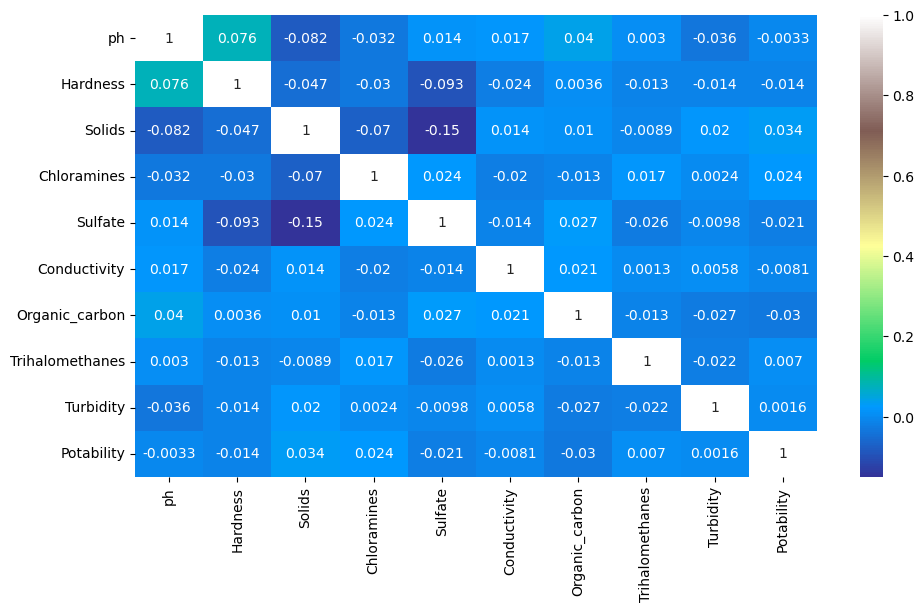

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(11,6)
plt.show()

### Lets check the outliers using box plot

<AxesSubplot:>

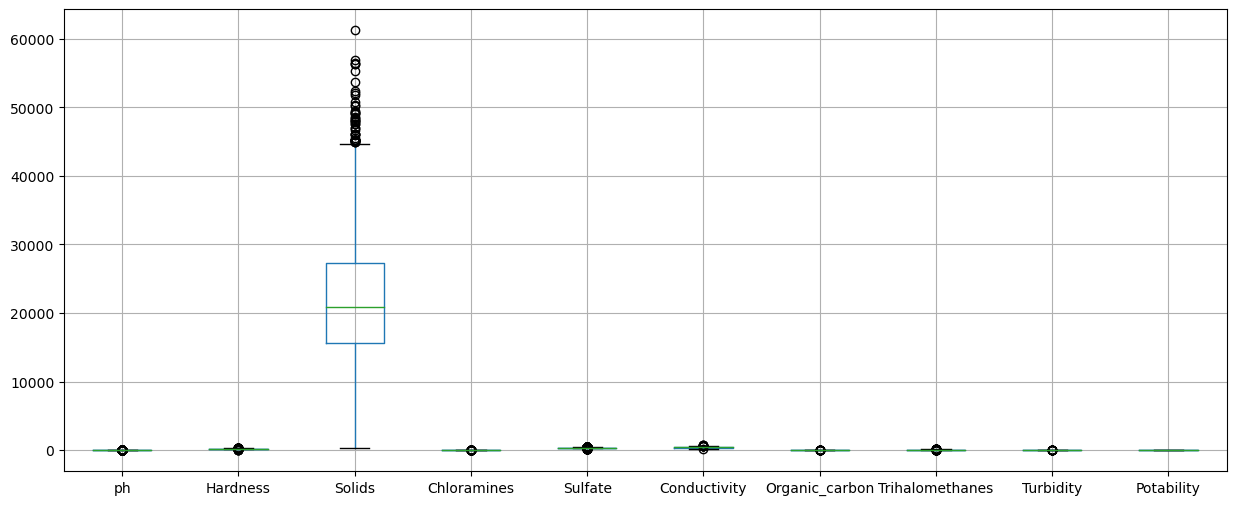

In [9]:
data.boxplot(figsize=(15,6))

In [10]:
#for normalizing we will apply the log function
data['Solids_log']=np.log(data["Solids"])



<AxesSubplot:>

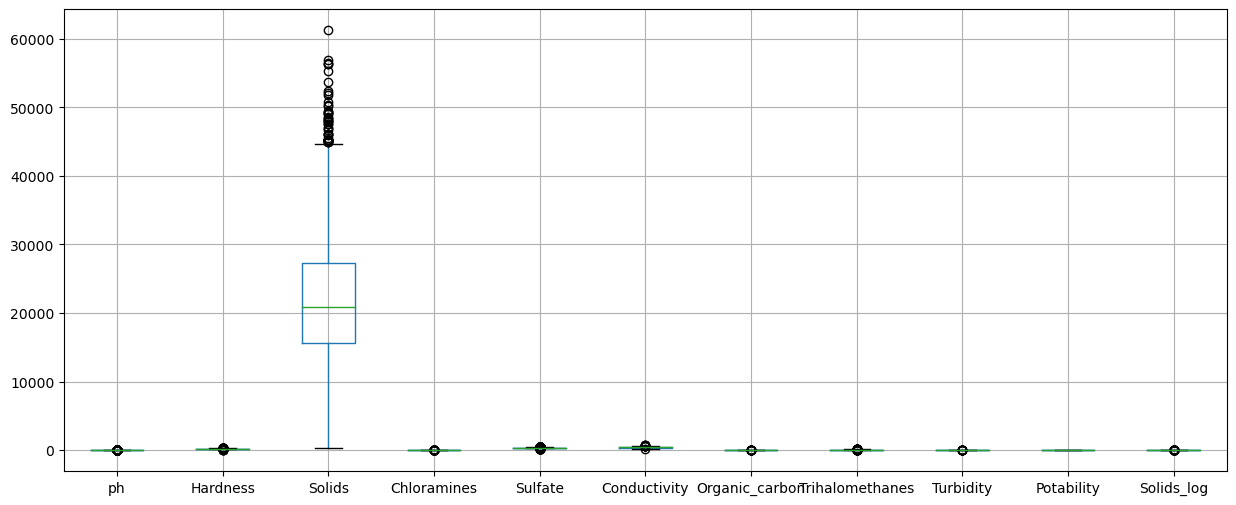

In [11]:
data.boxplot(figsize=(15,6))

In [12]:

data=data.drop("Solids",axis=1)


In [13]:
data.head()

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Solids_log
0,7.080795,204.890455,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,9.942291
1,3.716080,129.422921,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,9.832532
2,8.099124,224.236259,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,9.898954
3,8.316766,214.373394,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,9.999635
4,9.092223,181.101509,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,9.796959


# more eda

In [14]:
data.shape

(3276, 10)

In [15]:
data.isnull().sum()

ph                 0
Hardness           0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
Solids_log         0
dtype: int64

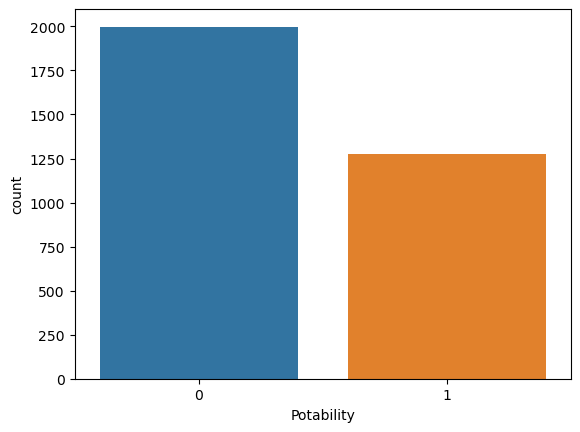

In [16]:
sns.countplot(data['Potability'])
plt.show()

In [17]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

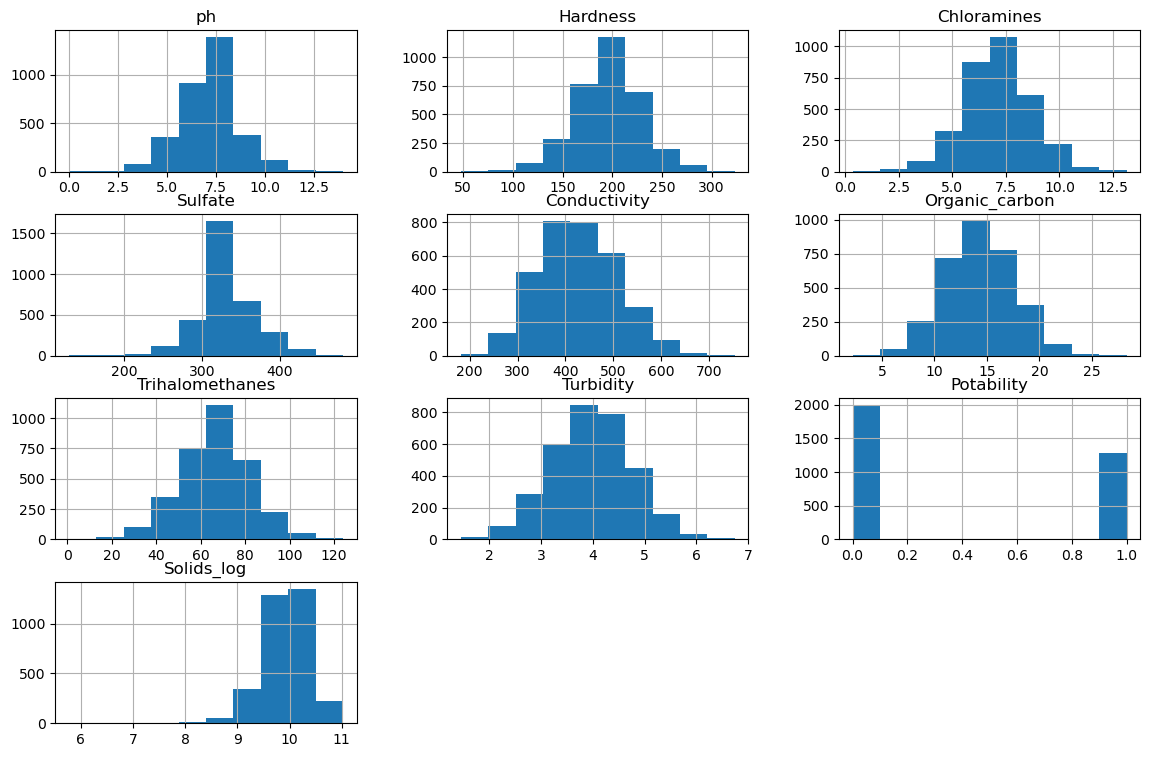

In [18]:
data.hist(figsize=(14,9))
plt.show()

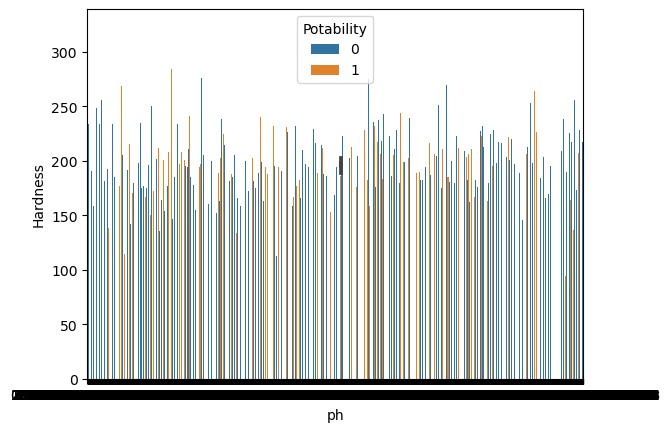

In [19]:
sns.barplot(x=data['ph'],y=data["Hardness"],hue=data['Potability'])
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Potability'>

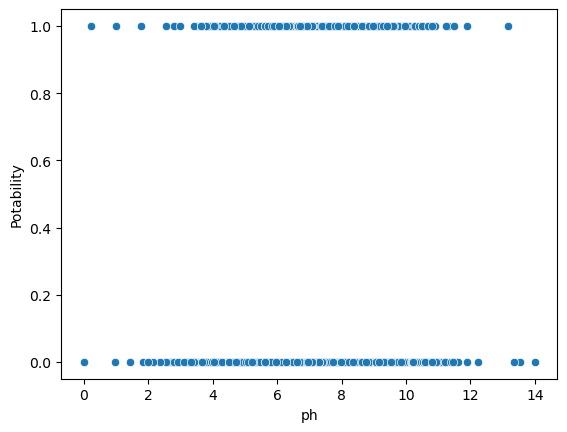

In [20]:
sns.scatterplot(x=data['ph'],y=data['Potability'])

# Model Training

In [21]:
X =data.drop("Potability",axis=1)
y =data['Potability']

In [22]:
X.head(4)


,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_log
0,7.080795,204.890455,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,9.942291
1,3.716080,129.422921,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,9.832532
2,8.099124,224.236259,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,9.898954
3,8.316766,214.373394,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,9.999635


In [23]:
y.head(4)

0    0
1    0
2    0
3    0
Name: Potability, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=0)

In [25]:
"""from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nss=StandardScaler()\nX_train=ss.fit_transform(X_train)\nX_test=ss.fit_transform(X_test)'

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy', min_samples_split= 9, splitter= 'best')
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [46]:
y_pred=DTClassifier.predict(X_test)
y_pred


array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy of the Decision tree is :",accuracy_score(y_pred,y_test))

The accuracy of the Decision tree is : 0.6189024390243902


In [29]:
confusion_matrix(y_pred,y_test)

array([[279, 130],
       [133, 114]], dtype=int64)

In [30]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [31]:
y_pred=NBClassifier.predict(X_test)

In [32]:
from sklearn import metrics
print("The accuracy of the Decision tree is :",metrics.accuracy_score(y_pred,y_test))

The accuracy of the Decision tree is : 0.625


# Model Optimization

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt=DecisionTreeClassifier()
criterion=["gini","entropy"]
splitter=['best','random']
min_samples_split=range(1,10)

parameters = dict(criterion =criterion,splitter=splitter,min_samples_split=min_samples_split)

cv= RepeatedStratifiedKFold(n_splits =5,random_state=10)

grid_search_cv_dt= GridSearchCV(estimator=dt,param_grid=parameters,scoring='accuracy',cv=cv)

In [38]:
grid_search_cv_dt.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=10),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}


In [41]:
prediction_grid=grid_search_cv_dt.predict(X_test)

In [42]:
accuracy_score(y_test,prediction_grid)

0.5960365853658537